In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Linear Regression

Epoch 0, cost = 18.666666031, W = 0.0100, b = 0.0100
Epoch 1000, cost = 0.056778032, W = 1.7183, b = 0.6243
Epoch 2000, cost = 0.001027451, W = 1.9622, b = 0.0839
Epoch 3000, cost = 0.000000686, W = 1.9990, b = 0.0022
Epoch 4000, cost = 0.000000000, W = 2.0000, b = 0.0000
Epoch 5000, cost = 0.000000000, W = 2.0000, b = 0.0000
Epoch 6000, cost = 0.000000000, W = 2.0000, b = 0.0000
Epoch 7000, cost = 0.000000000, W = 2.0000, b = 0.0000
Epoch 8000, cost = 0.000000000, W = 2.0000, b = 0.0000
Epoch 9000, cost = 0.000000000, W = 2.0000, b = 0.0000
Epoch 10000, cost = 0.000000000, W = 2.0000, b = 0.0000
tensor([[12.],
        [14.],
        [16.]])


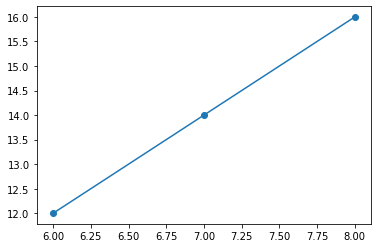

In [13]:

x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[2],[4],[6]])

x_test=torch.FloatTensor([[6],[7],[8]])
y_test=torch.FloatTensor([[12],[14],[16]])

W=torch.zeros(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)

optimizer=optim.Adam([W,b],lr=0.01)

for epoch in range(10001):
    hypothesis=x_train*W+b
    
    optimizer.zero_grad()
    
    cost=torch.mean((hypothesis-y_train)**2)
    cost.backward()
    
    optimizer.step()
    
    if epoch%1000==0:
        print('Epoch {}, cost = {:.9f}, W = {:.4f}, b = {:.4f}'.format(epoch,cost.item(),W.item(),b.item()))
    
with torch.no_grad():
    predict=x_test*W+b
    print(predict)
    
    plt.scatter(x_test,y_test)
    plt.plot(x_test.numpy(),predict.numpy())
    plt.show()

# Multivariate Linear Regression

In [49]:
x_train=torch.FloatTensor([[73,80,75],
                          [93,88,93],
                          [89,91,80],
                          [96,98,100],
                          [73,66,70]])
y_train=torch.FloatTensor([[175],[185],[180],[196],[142]])

df=pd.DataFrame(x_train.numpy())
df['result']=y_train.numpy()

df

,0,1,2,result
0,73.0,80.0,75.0,175.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,80.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [51]:

net=nn.Linear(3,1,bias=True)
#W=torch.zeros((3,1),requires_grad=True)
#b=torch.zeros(1,requires_grad=True)

optimizer=optim.Adam(net.parameters(),lr=0.01)
#optimizer=optim.Adam([W,b],lr=0.01)

for epoch in range(10001):
    
    hypothesis=net(x_train)
    #hypothesis=x_train*W+b
    
    optimizer.zero_grad()
    
    cost = F.mse_loss(hypothesis,y_train)
    #cost = torch.mean((h-y_train)**2)
    
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {}, cost = {:.9f}'.format(epoch,cost.item()))

x_test=torch.FloatTensor([[85,88,99]])

df=pd.DataFrame(x_test.numpy())

with torch.no_grad():
    predict=net(x_test)
    print(predict)
    df['result']=predict.numpy()
    
df

Epoch 0, cost = 18619.648437500
Epoch 1000, cost = 60.214290619
Epoch 2000, cost = 52.808219910
Epoch 3000, cost = 44.826484680
Epoch 4000, cost = 38.518627167
Epoch 5000, cost = 33.982631683
Epoch 6000, cost = 29.592504501
Epoch 7000, cost = 24.665334702
Epoch 8000, cost = 19.756641388
Epoch 9000, cost = 15.608596802
Epoch 10000, cost = 12.641724586
tensor([[191.2197]])


,0,1,2,result
0,85.0,88.0,99.0,191.21965
